# Problem Statement:

The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.

# Objectives:

### Data Preparation:

- Download and extract the cats vs. dogs dataset.  
- Organize the dataset into a structured directory format suitable for TensorFlow’s ImageDataGenerator.  
- Split the dataset into training and testing sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy

In [2]:
# os.rename('Dataset/PetImages', 'Dataset/Train')

In [3]:
#for cats in os.listdir('Dataset/Train/Cat'):
#    shutil.move(f'Dataset/Train/Cat/{cats}', f'Dataset/Train/Cat-{cats}')

In [4]:
#for dogs in os.listdir('Dataset/Train/Dog'):
#    shutil.move(f'Dataset/Train/Dog/{dogs}', f'Dataset/Train/Dog-{dogs}')

In [5]:
#os.mkdir("Dataset/Test")
#os.mkdir("Dataset/Validation")

In [6]:
# Setting aside 500 images of each category for test evaluation
#test_dog = np.random.choice([i for i in os.listdir('Dataset/Train/') if 'Dog' in i], 500, replace=False)
#test_cat = np.random.choice([i for i in os.listdir('Dataset/Train/') if 'Cat' in i], 500, replace=False)

#for imageName in test_dog:
#  shutil.move('Dataset/Train/' + imageName, "Dataset/Test")
#for imageName in test_cat:
 # shutil.move('Dataset/Train/' + imageName, "Dataset/Test")

### Data Augmentation and Preprocessing:

- Implement data augmentation techniques to increase the diversity of the training dataset, aiding in the model's ability to generalize.  
- Normalize the pixel values of the images for optimal model performance.

In [7]:
# Image Data Generator
idg = ImageDataGenerator(horizontal_flip = True, rotation_range = 30, rescale = 1/255.0, validation_split = 0.1)

In [8]:
batch_size = 64

In [9]:
train_idg = idg.flow_from_directory("Dataset/Train", target_size=(150, 150), batch_size = batch_size, subset="training")

Found 21598 images belonging to 2 classes.


In [10]:
val_idg = idg.flow_from_directory("Dataset/Train", target_size=(150, 150), batch_size = batch_size, subset="validation")

Found 2398 images belonging to 2 classes.


### Model Building:

- Construct a Convolutional Neural Network using TensorFlow and Keras.  
- The model should contain multiple convolutional layers, pooling layers, and fully connected layers.

### Training:

- Compile the model and train it on the prepared dataset.  
- Utilize categorical cross entropy as the loss function and stochastic gradient descent as the optimizer.  
- Train the model for a sufficient number of epochs to achieve good performance.

### Evaluation:

- Evaluate the model's performance on the validation set during training to
monitor for overfitting.
- After training, assess the model's accuracy and make predictions on the
test set.

In [12]:
np.random.seed(123)
model = Sequential()
model.add(Input((150,150,3), name="Input"))
# First convolution layer with relu and pooling
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="valid", strides=(1,1), activation="relu", name="Conv1" ))
model.add(MaxPooling2D(pool_size=(2,2), strides =(2,2), padding="valid", name="Pool1"))
# Second convolution layer with relu and pooling
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="valid", strides=(1,1), activation="relu", name="Conv2"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid", name="Pool2"))
# Second convolution layer with relu and pooling
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="valid", strides=(1,1), activation="relu", name="Conv3"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid", name="Pool3"))
# Flatten the layer
model.add(Flatten(name="Flat"))
# Defining the fully connected layers
model.add(Dense(64, activation="relu", name="Dense1"))
model.add(Dense(2, activation="softmax", name="Output"))
model.compile(optimizer = SGD(), loss = "categorical_crossentropy", metrics = ["accuracy"])
model.fit(train_idg, epochs=30, batch_size = batch_size, validation_data = val_idg)

Epoch 1/30
338/338 [==============================] - 466s 1s/step - loss: 0.6868 - accuracy: 0.5482 - val_loss: 0.6743 - val_accuracy: 0.6130
Epoch 2/30
338/338 [==============================] - 501s 1s/step - loss: 0.6721 - accuracy: 0.5819 - val_loss: 0.6629 - val_accuracy: 0.5872
Epoch 3/30
338/338 [==============================] - 495s 1s/step - loss: 0.6620 - accuracy: 0.5959 - val_loss: 0.6494 - val_accuracy: 0.6188
Epoch 4/30
338/338 [==============================] - 446s 1s/step - loss: 0.6453 - accuracy: 0.6203 - val_loss: 0.6274 - val_accuracy: 0.6543
Epoch 5/30
338/338 [==============================] - 441s 1s/step - loss: 0.6207 - accuracy: 0.6555 - val_loss: 0.6000 - val_accuracy: 0.6747
Epoch 6/30
338/338 [==============================] - 444s 1s/step - loss: 0.5975 - accuracy: 0.6765 - val_loss: 0.5947 - val_accuracy: 0.6743
Epoch 7/30
338/338 [==============================] - 440s 1s/step - loss: 0.5799 - accuracy: 0.6928 - val_loss: 0.5685 - val_accuracy: 0.7031

Due to less computational power we will continue with this model. It couldhave gone for further improvement if we would have let it run for more epochs.

In [13]:
history1 = model.history.history

In [14]:
train_loss= history1['loss']
val_loss = history1['val_loss']

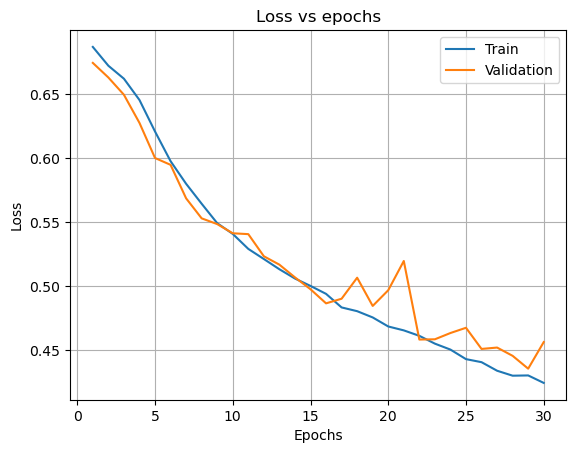

In [15]:
plt.plot(range(1, 30 + 1), train_loss, label = 'Train')
plt.plot(range(1, 30 + 1), val_loss, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [16]:
train_accuracy = history1['accuracy']
val_accuracy = history1['val_accuracy']

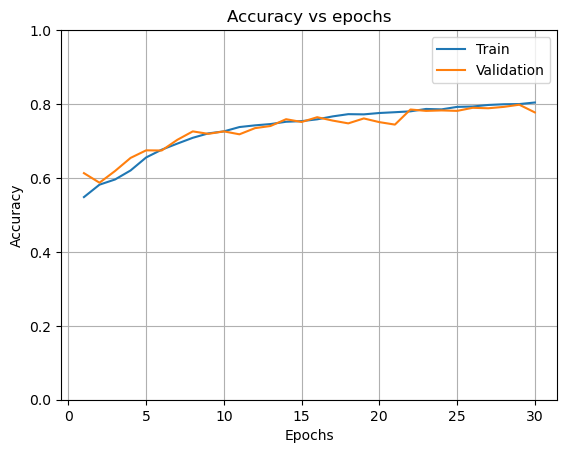

In [17]:
plt.plot(range(1, 30 + 1), train_accuracy, label = 'Train')
plt.plot(range(1, 30 + 1), val_accuracy, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

(1, 150, 150, 3)

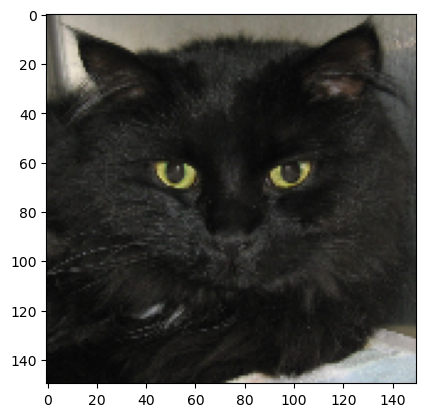

In [21]:
# Images in Test
test_image = "Dataset/Test/Cat-4796.jpg"
test_image = cv2.imread(test_image)
test_image = cv2.resize(test_image, (150, 150))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
test_image.shape

In [22]:
model.predict(test_image)

1/1 [==============================] - 0s 119ms/step


array([[0.9107691 , 0.08923089]], dtype=float32)

In [23]:
train_idg.class_indices

{'Cat': 0, 'Dog': 1}

In [27]:
test_results = {}
for imageName in os.listdir("Dataset/test/"):
    test_image = "Dataset/test/" + imageName
    test_image = cv2.imread(test_image)
    try:
        test_image = cv2.resize(test_image, (150, 150))
    except:
        print(f'Couldn"t resize image {imageName}')
    else:
        test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
        # plt.imshow(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        test_image = test_image / 255.0
        result = model.predict(test_image)
        test_results[imageName] = result

1/1 [==============================] - 0s 46ms/step
Couldn"t resize image Cat-3491.jpg
1/1 [==============================] - 0s 68ms/step
Couldn"t resize image Dog-3136.jpg
1/1 [==============================] - 0s 53ms/step
Couldn"t resize image Dog-3288.jpg
1/1 [==============================] - 0s 147ms/step
Couldn"t resize image Dog-4367.jpg
1/1 [==============================] - 0s 77ms/step


In [28]:
test_results

{'Cat-10029.jpg': array([[0.84764725, 0.15235277]], dtype=float32),
 'Cat-10036.jpg': array([[0.99500895, 0.00499107]], dtype=float32),
 'Cat-10084.jpg': array([[0.92568415, 0.07431591]], dtype=float32),
 'Cat-10107.jpg': array([[0.6249658, 0.3750342]], dtype=float32),
 'Cat-10116.jpg': array([[0.25047952, 0.7495205 ]], dtype=float32),
 'Cat-10136.jpg': array([[0.9740578 , 0.02594218]], dtype=float32),
 'Cat-10189.jpg': array([[0.9626712 , 0.03732876]], dtype=float32),
 'Cat-1021.jpg': array([[0.9127962 , 0.08720385]], dtype=float32),
 'Cat-10227.jpg': array([[0.69459414, 0.3054058 ]], dtype=float32),
 'Cat-10237.jpg': array([[0.9814184 , 0.01858157]], dtype=float32),
 'Cat-1025.jpg': array([[0.970288  , 0.02971208]], dtype=float32),
 'Cat-10289.jpg': array([[0.74323255, 0.25676742]], dtype=float32),
 'Cat-10314.jpg': array([[0.97472996, 0.02527006]], dtype=float32),
 'Cat-10326.jpg': array([[0.8966516 , 0.10334843]], dtype=float32),
 'Cat-1039.jpg': array([[0.84068733, 0.15931262]], d

In [29]:
train_idg.class_indices

{'Cat': 0, 'Dog': 1}

In [30]:
y_pred = []
y_actual = []
for key, val in test_results.items():
    if 'Dog' in key:
        y_actual.append(1)
    else:
        y_actual.append(0)
    y_pred.append(np.argmax(val[0]))

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_actual, y_pred)

0.7811244979919679

In [39]:
classes = {val: key for key, val in train_idg.class_indices.items()}

In [40]:
classes

{0: 'Cat', 1: 'Dog'}

We are able to get 78% accuracy on test daat which is close to training test accuracy and thus the model is not seen to overfit severely.

### Prediction:

- Implement a system to make predictions on new images, categorizing them as either cat or dog.  
- The system should be able to take an image (or a batch of images), preprocess it, and pass it through the model for prediction.

In [51]:
def make_prediction_on_image(path, model, classes):
    test_image = cv2.imread(path)
    try:
        test_image = cv2.resize(test_image, (150, 150))
    except:
        print('Unable to parse the image')
        return os.path.split(path)[1], None, None
    else:
        test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
        test_image = np.expand_dims(test_image, axis=0)
        test_image = test_image / 255.0
        result = model.predict(test_image)
        return os.path.split(path)[1], result, classes[np.argmax(result[0])]

In [52]:
make_prediction_on_image('Dataset/Test/Cat-4796.jpg', model, classes)

1/1 [==============================] - 0s 47ms/step


('Cat-4796.jpg', array([[0.9107691 , 0.08923089]], dtype=float32), 'Cat')

In [55]:
def make_predictions_for_folder(path, model, classes):
    y_pred = []
    for imageName in os.listdir(path):
        test_image = os.path.join(path, imageName)
        returned = np.array(make_prediction_on_image(test_image, model, classes))
        if returned[2] != None:
            y_pred.append(returned)
    return y_pred

In [56]:
make_predictions_for_folder('Dataset/Test/', model, classes)

1/1 [==============================] - 0s 47ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_10604\1747292953.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  returned = np.array(make_prediction_on_image(test_image, model, classes))


1/1 [==============================] - 0s 71ms/step
Unable to parse the image
1/1 [==============================] - 0s 46ms/step
Unable to parse the image
1/1 [==============================] - 0s 48ms/step
Unable to parse the image
1/1 [==============================] - 0s 48ms/step
Unable to parse the image
1/1 [==============================] - 0s 51ms/step


[array(['Cat-10029.jpg', array([[0.84764725, 0.15235277]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10036.jpg', array([[0.99500895, 0.00499107]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10084.jpg', array([[0.92568415, 0.07431591]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10107.jpg', array([[0.6249658, 0.3750342]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10116.jpg', array([[0.25047952, 0.7495205 ]], dtype=float32),
        'Dog'], dtype=object),
 array(['Cat-10136.jpg', array([[0.9740578 , 0.02594218]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10189.jpg', array([[0.9626712 , 0.03732876]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-1021.jpg', array([[0.9127962 , 0.08720385]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10227.jpg', array([[0.69459414, 0.3054058 ]], dtype=float32),
        'Cat'], dtype=object),
 array(['Cat-10237.jpg', array([[0.9814184 , 0.01